In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
from pandas.api.types import CategoricalDtype

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

,score,first-contentful-paint,largest-contentful-paint,total-blocking-time,cumulative-layout-shift,speed-index
id,,,,,,
1,0.65,4551.911975,5323.144365,146.293825,0.000000,5692.029897
2,0.65,4580.972425,5359.044315,156.111525,0.000413,5722.165946
3,0.68,4506.591050,5270.842440,7.998500,0.000413,5461.752421
4,0.67,4525.639400,5363.228900,26.813700,0.000000,5520.925360
5,0.67,4527.354300,5295.409690,15.623950,0.000000,5508.775644


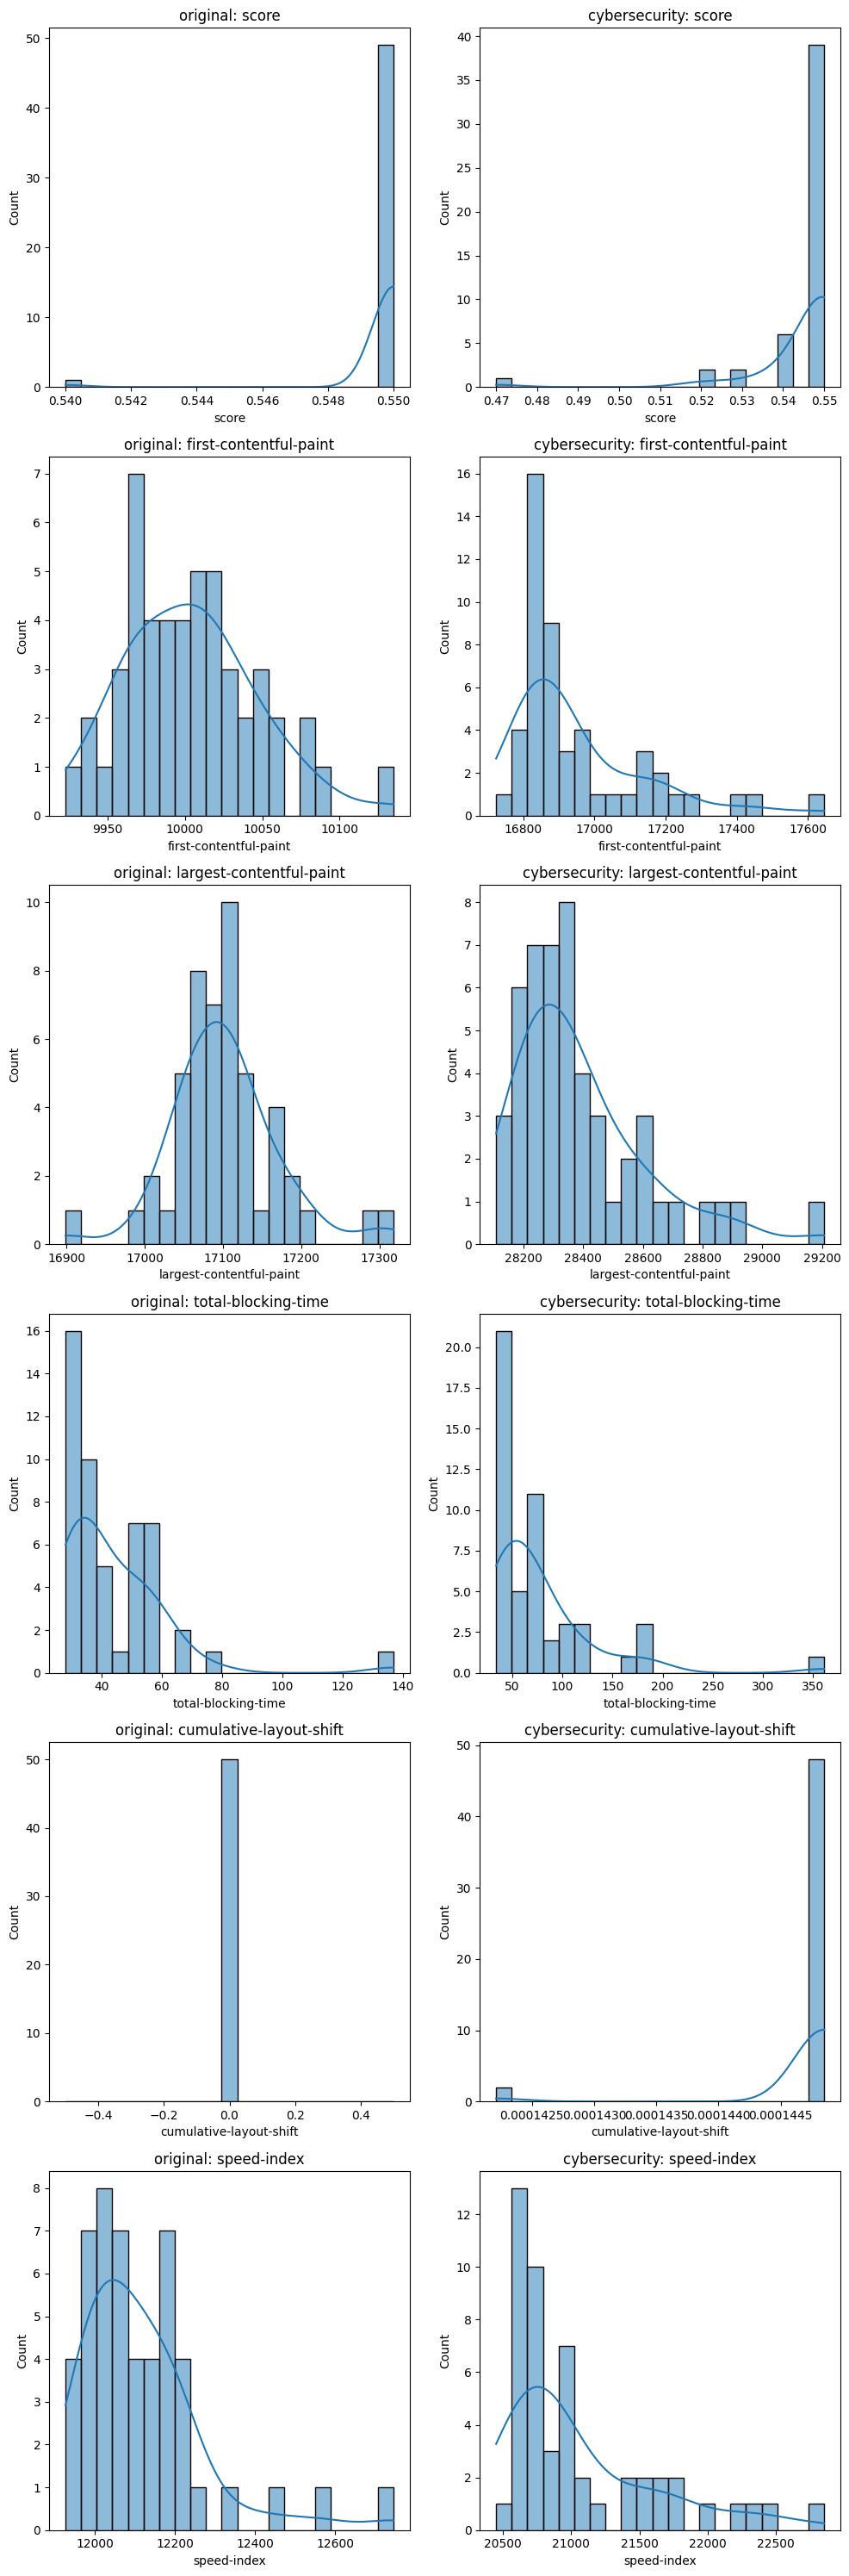

In [14]:
original = pd.read_csv(filepath_or_buffer='../data/processed/performance_testing/original/login.csv', delimiter=',', header=0, index_col=0)
cybersecurity = pd.read_csv(filepath_or_buffer='../data/processed/performance_testing/cybersecurity/login.csv', delimiter=',', header=0, index_col=0)


figure, axes = plt.subplots(len(original.columns), 2, figsize=(10, 5*len(original.columns)))

for ax, column in zip(axes, original.columns):
    sns.histplot(data=original, x=column, bins=21, kde=True, ax=ax[0])
    ax[0].set_title(f"original: {column}")

for ax, column in zip(axes, cybersecurity.columns):
    sns.histplot(data=cybersecurity, x=column, bins=21, kde=True, ax=ax[1])
    ax[1].set_title(f"cybersecurity: {column}")

plt.tight_layout()

plt.savefig('output.png', dpi=300)

plt.show()


In [2]:
base_path = '../data/processed/performance_testing'
tests = ['login',  'places', 'transactions', 'transactions-edit']

for test in tests:
    original = pd.read_csv(filepath_or_buffer=f'{base_path}/original/{test}.csv', delimiter=',', header=0, index_col=0)
    cybersecurity = pd.read_csv(filepath_or_buffer=f'{base_path}/cybersecurity/{test}.csv', delimiter=',', header=0, index_col=0)

    original_scores = original.score.unique()
    cybersecurity_scores = cybersecurity.score.unique()

    print(f'{test}:')
    print(f'original:      {sorted(original_scores, reverse=True)}')
    print(f'cybersecurity: {sorted(cybersecurity_scores, reverse=True)}\n')

login:
original:      [0.55, 0.54]
cybersecurity: [0.55, 0.54, 0.53, 0.52, 0.47]

places:
original:      [0.87, 0.86, 0.85, 0.84]
cybersecurity: [0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.61, 0.6, 0.59, 0.57]

transactions:
original:      [0.87, 0.86, 0.85, 0.84]
cybersecurity: [0.68, 0.67, 0.66, 0.65, 0.64, 0.62, 0.61, 0.6, 0.59, 0.58, 0.53, 0.51, 0.5]

transactions-edit:
original:      [0.87, 0.86, 0.85, 0.84, 0.82]
cybersecurity: [0.68, 0.67, 0.66, 0.65, 0.64, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55]

